# 1. Kết nối tới drive , import một số thư viện cần thiết

In [53]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [54]:
import numpy.polynomial.polynomial as poly
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn import neighbors
from datetime import datetime
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split

In [55]:
VIC = pd.read_csv("/content/drive/MyDrive/DAB Final Project/Source Code/Dataset/VIC.csv")

In [56]:
VIC

,Date,Price,Open,High,Low,Vol.,Change %
0,12/1/2017,61653,61570,62314,60992,1.17M,0.13%
1,12/4/2017,62893,62066,63802,61570,2.08M,2.01%
2,12/5/2017,60331,63636,64876,58512,4.46M,-4.07%
3,12/6/2017,60331,60826,60826,57769,3.24M,0.00%
4,12/7/2017,59504,59917,60992,58678,1.22M,-1.37%
...,...,...,...,...,...,...,...
1371,6/5/2023,52100,52100,52500,52000,1.82M,0.19%
1372,6/6/2023,53200,52200,53200,52200,2.12M,2.11%
1373,6/7/2023,52800,53300,53600,52600,1.66M,-0.75%
1374,6/8/2023,52400,52800,53000,52400,1.44M,-0.76%


In [57]:
VIC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1376 entries, 0 to 1375
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      1376 non-null   object
 1   Price     1376 non-null   int64 
 2   Open      1376 non-null   int64 
 3   High      1376 non-null   int64 
 4   Low       1376 non-null   int64 
 5   Vol.      1376 non-null   object
 6   Change %  1376 non-null   object
dtypes: int64(4), object(3)
memory usage: 75.4+ KB


# 2. Tiền xử lý dữ liệu

<h1>Loại bỏ một số dữ liệu trống trong dataset

In [58]:
VIC = VIC.reset_index(drop=True) # Reset the index

In [59]:
# Drop missing values
VIC = VIC.dropna()

In [60]:
VIC = VIC.reset_index()['Price'].astype(float)

In [61]:
# VIC['Index'] = np.arange(len(VIC.index))

In [62]:
VIC.info()

<class 'pandas.core.series.Series'>
RangeIndex: 1376 entries, 0 to 1375
Series name: Price
Non-Null Count  Dtype  
--------------  -----  
1376 non-null   float64
dtypes: float64(1)
memory usage: 10.9 KB


# 4. Chia tập dữ liệu để train-test-validate theo tỉ lệ 7:2:1

In [63]:
# Split the data into training, testing, and validation sets
train_size = int(0.7 * len(VIC))
test_size = int(0.2 * len(VIC))
val_size = len(VIC) - train_size - test_size

In [64]:
train_data = VIC[:train_size]
test_data = VIC[train_size:train_size+test_size]
val_data = VIC[train_size+test_size:]

In [65]:
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data)
x_test = np.array(test_data.index).reshape(-1,1)
y_test = np.array(test_data)
x_val = np.array(val_data.index).reshape(-1,1)
y_val = np.array(val_data)

<h1>Finding the best value for K

In [66]:
from math import sqrt

In [67]:
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)
    model.fit(x_train, y_train)  #fit the model
    pred=model.predict(x_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 20405.173140875107
RMSE value for k=  2 is: 20056.003408637345
RMSE value for k=  3 is: 19355.36685941722
RMSE value for k=  4 is: 18935.63325632871
RMSE value for k=  5 is: 18664.577047542127
RMSE value for k=  6 is: 18487.09325912858
RMSE value for k=  7 is: 18291.884936918188
RMSE value for k=  8 is: 18140.194195612832
RMSE value for k=  9 is: 18043.597656401096
RMSE value for k=  10 is: 17890.323590752017
RMSE value for k=  11 is: 17756.20966924478
RMSE value for k=  12 is: 17626.927940976093
RMSE value for k=  13 is: 17558.114697084548
RMSE value for k=  14 is: 17503.596598343753
RMSE value for k=  15 is: 17419.491439769477
RMSE value for k=  16 is: 17329.445919609832
RMSE value for k=  17 is: 17286.14173093927
RMSE value for k=  18 is: 17250.881400407026
RMSE value for k=  19 is: 17248.020840552752
RMSE value for k=  20 is: 17343.882704652013


<Axes: >

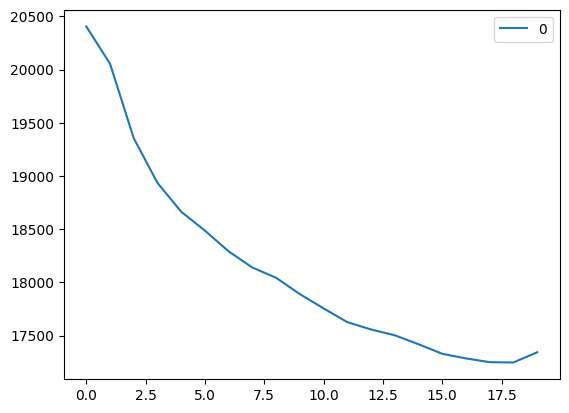

In [68]:
curve = pd.DataFrame(rmse_val) #elbow curve
curve.plot()

<h1>K-Nearest Neighbor

In [69]:
# Create and fit a KNN model
model = KNeighborsRegressor(n_neighbors = 19)
model.fit(x_train, y_train)

KNeighborsRegressor(n_neighbors=19)

In [70]:
# Use the trained KNN model 'knn' to make predictions on the test set 'x_test' and assign the predictions to 'y_pred'
y_pred = model.predict(x_test)

# Use the trained KNN model 'knn' to make predictions on the test set 'x_val' and assign the predictions to 'y_pred_val'
y_pred_val =  model.predict(x_val)

In [71]:
import sys

In [72]:
#  Create index for next 30 days
last_index =  VIC.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)


x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# print(x_next_30_days)
# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(x_next_30_days)
# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[87894.73684211 87894.73684211 87894.73684211 87894.73684211
 87894.73684211 87894.73684211 87894.73684211 87894.73684211
 87894.73684211 87894.73684211 87894.73684211 87894.73684211
 87894.73684211 87894.73684211 87894.73684211 87894.73684211
 87894.73684211 87894.73684211 87894.73684211 87894.73684211
 87894.73684211 87894.73684211 87894.73684211 87894.73684211
 87894.73684211 87894.73684211 87894.73684211 87894.73684211
 87894.73684211 87894.73684211]


<h1> Vẽ hình mô tả dự đoán

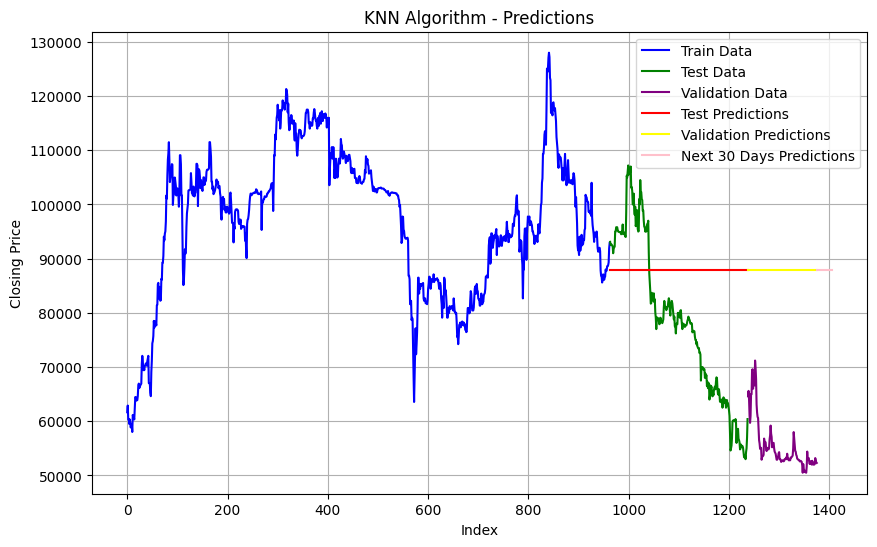

In [73]:
plt.figure(figsize=(10, 6))
plt.plot(x_train, y_train, color='blue', label='Train Data')
plt.plot(x_test, y_test, color='green', label='Test Data')
plt.plot(x_val, y_val, color='purple', label='Validation Data')
plt.plot(x_test, y_pred, color='red', label='Test Predictions')
plt.plot(x_val, y_pred_val, color='yellow', label='Validation Predictions')
plt.plot(x_next_30_days, y_next_30_days, color='pink', label='Next 30 Days Predictions')
plt.xlabel('Index')
plt.ylabel('Closing Price')
plt.title('KNN Algorithm - Predictions')
plt.legend()
plt.grid(True)
plt.show()

<h1>Đánh giá độ chính xác của thuật toán

In [74]:
#RMSE
valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)

Validation RMSE: 32794.76754412072
Testing RMSE: 17248.020840552752


In [75]:
#MAE
valid_mae = mean_absolute_error(y_val,y_pred_val)
test_mae = mean_absolute_error(y_test, y_pred)
print('Validation MAE:', valid_mae)
print('Testing MAE:', test_mae)

Validation MAE: 32465.751334858895
Testing MAE: 14849.722488038278


In [76]:
#MAPE
valid_mape = np.mean(np.abs((y_val - y_pred_val) / y_val))*100
test_mape = np.mean(np.abs((y_test - y_pred) / y_test))*100
print('Validation MAPE:', valid_mape)
print('Testing MAPE:', test_mape)

Validation MAPE: 59.54544530602281
Testing MAPE: 21.44237461656123


# 5. Chia tập dữ liệu để train-test-validate theo tỉ lệ 6:3:1

In [77]:
# Split the data into training, testing, and validation sets
train_size = int(0.6 * len(VIC))
test_size = int(0.3 * len(VIC))
val_size = len(VIC) - train_size - test_size

In [78]:
train_data = VIC[:train_size]
test_data = VIC[train_size:train_size+test_size]
val_data = VIC[train_size+test_size:]

In [79]:
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data)
x_test = np.array(test_data.index).reshape(-1,1)
y_test = np.array(test_data)
x_val = np.array(val_data.index).reshape(-1,1)
y_val = np.array(val_data)

<h1>Finding the best value for K

In [80]:
from math import sqrt

In [81]:
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)
    model.fit(x_train, y_train)  #fit the model
    pred=model.predict(x_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 20869.998587418133
RMSE value for k=  2 is: 20269.020626207646
RMSE value for k=  3 is: 19870.897207598642
RMSE value for k=  4 is: 19766.018263170146
RMSE value for k=  5 is: 19798.427440493975
RMSE value for k=  6 is: 19691.228766021777
RMSE value for k=  7 is: 19503.12926289967
RMSE value for k=  8 is: 19401.394266153195
RMSE value for k=  9 is: 19350.157659978366
RMSE value for k=  10 is: 19305.594606785708
RMSE value for k=  11 is: 19269.44173298424
RMSE value for k=  12 is: 19242.778305712563
RMSE value for k=  13 is: 19169.90496471731
RMSE value for k=  14 is: 19154.542438516462
RMSE value for k=  15 is: 19148.907974105907
RMSE value for k=  16 is: 19158.294362545435
RMSE value for k=  17 is: 19166.59331471117
RMSE value for k=  18 is: 19201.804471903066
RMSE value for k=  19 is: 19239.67708360631
RMSE value for k=  20 is: 19283.866307970744


<Axes: >

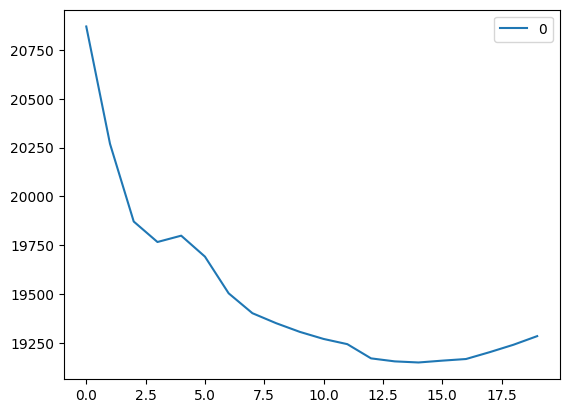

In [82]:
curve = pd.DataFrame(rmse_val) #elbow curve
curve.plot()

<h1>K-Nearest Neighbor

In [83]:
# Create and fit a KNN model
model = KNeighborsRegressor(n_neighbors = 15)
model.fit(x_train, y_train)

KNeighborsRegressor(n_neighbors=15)

In [84]:
# Use the trained KNN model 'knn' to make predictions on the test set 'x_test' and assign the predictions to 'y_pred'
y_pred = model.predict(x_test)

# Use the trained KNN model 'knn' to make predictions on the test set 'x_val' and assign the predictions to 'y_pred_val'
y_pred_val =  model.predict(x_val)

In [85]:
import sys

In [86]:
#  Create index for next 30 days
last_index =  VIC.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)


x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# print(x_next_30_days)
# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(x_next_30_days)
# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[94672.6 94672.6 94672.6 94672.6 94672.6 94672.6 94672.6 94672.6 94672.6
 94672.6 94672.6 94672.6 94672.6 94672.6 94672.6 94672.6 94672.6 94672.6
 94672.6 94672.6 94672.6 94672.6 94672.6 94672.6 94672.6 94672.6 94672.6
 94672.6 94672.6 94672.6]


<h1> Vẽ hình mô tả dự đoán

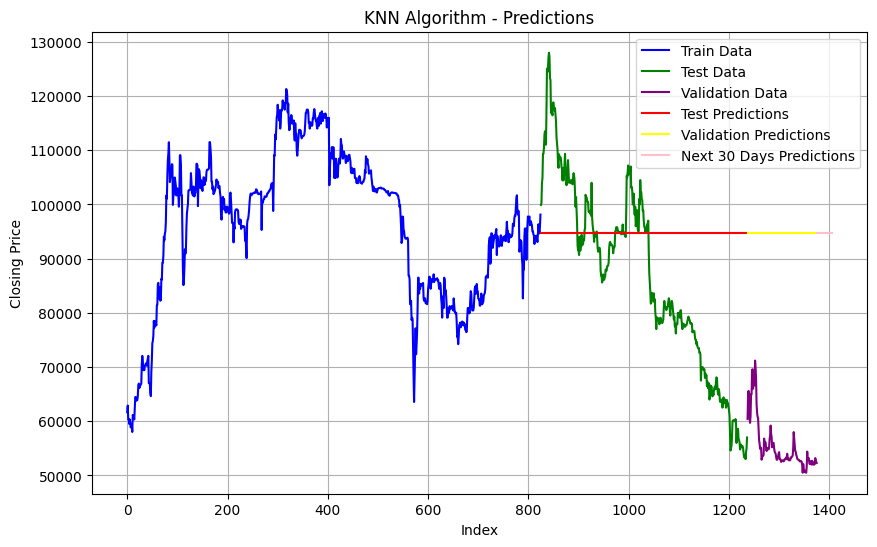

In [87]:
plt.figure(figsize=(10, 6))
plt.plot(x_train, y_train, color='blue', label='Train Data')
plt.plot(x_test, y_test, color='green', label='Test Data')
plt.plot(x_val, y_val, color='purple', label='Validation Data')
plt.plot(x_test, y_pred, color='red', label='Test Predictions')
plt.plot(x_val, y_pred_val, color='yellow', label='Validation Predictions')
plt.plot(x_next_30_days, y_next_30_days, color='pink', label='Next 30 Days Predictions')
plt.xlabel('Index')
plt.ylabel('Closing Price')
plt.title('KNN Algorithm - Predictions')
plt.legend()
plt.grid(True)
plt.show()

<h1>Đánh giá độ chính xác của thuật toán

In [88]:
#RMSE
valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)

Validation RMSE: 39481.000949062276
Testing RMSE: 19148.907974105907


In [89]:
#MAE
valid_mae = mean_absolute_error(y_val,y_pred_val)
test_mae = mean_absolute_error(y_test, y_pred)
print('Validation MAE:', valid_mae)
print('Testing MAE:', test_mae)

Validation MAE: 39207.851798561154
Testing MAE: 15284.174757281555


In [90]:
#MAPE
valid_mape = np.mean(np.abs((y_val - y_pred_val) / y_val))*100
test_mape = np.mean(np.abs((y_test - y_pred) / y_test))*100
print('Validation MAPE:', valid_mape)
print('Testing MAPE:', test_mape)

Validation MAPE: 71.73986415766406
Testing MAPE: 20.7548148018234


# 6. Chia tập dữ liệu để train-test-validate theo tỉ lệ 5:3:2

In [91]:
# Split the data into training, testing, and validation sets
train_size = int(0.5 * len(VIC))
test_size = int(0.3 * len(VIC))
val_size = len(VIC) - train_size - test_size

In [92]:
train_data = VIC[:train_size]
test_data = VIC[train_size:train_size+test_size]
val_data = VIC[train_size+test_size:]

In [93]:
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data)
x_test = np.array(test_data.index).reshape(-1,1)
y_test = np.array(test_data)
x_val = np.array(val_data.index).reshape(-1,1)
y_val = np.array(val_data)

<h1>Finding the best value for K

In [94]:
from math import sqrt

In [95]:
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)
    model.fit(x_train, y_train)  #fit the model
    pred=model.predict(x_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 16746.81349395927
RMSE value for k=  2 is: 15875.54254519728
RMSE value for k=  3 is: 15479.634855503173
RMSE value for k=  4 is: 15586.39525310595
RMSE value for k=  5 is: 16019.813410749908
RMSE value for k=  6 is: 16324.847441075202
RMSE value for k=  7 is: 16434.6533051266
RMSE value for k=  8 is: 16517.303680369227
RMSE value for k=  9 is: 16581.75998077105
RMSE value for k=  10 is: 16774.869561997755
RMSE value for k=  11 is: 17122.282359041998
RMSE value for k=  12 is: 17420.765057259065
RMSE value for k=  13 is: 17647.33638074014
RMSE value for k=  14 is: 17842.685083777633
RMSE value for k=  15 is: 17954.018547283278
RMSE value for k=  16 is: 18065.519834850245
RMSE value for k=  17 is: 18138.14064460336
RMSE value for k=  18 is: 18227.4212830811
RMSE value for k=  19 is: 18303.56676468407
RMSE value for k=  20 is: 18346.27112587729


<Axes: >

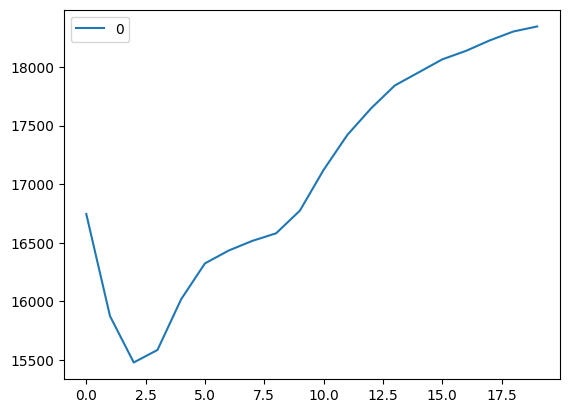

In [96]:
curve = pd.DataFrame(rmse_val) #elbow curve
curve.plot()

<h1>K-Nearest Neighbor

In [97]:
# Create and fit a KNN model
model = KNeighborsRegressor(n_neighbors = 3)
model.fit(x_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [98]:
# Use the trained KNN model 'knn' to make predictions on the test set 'x_test' and assign the predictions to 'y_pred'
y_pred = model.predict(x_test)

# Use the trained KNN model 'knn' to make predictions on the test set 'x_val' and assign the predictions to 'y_pred_val'
y_pred_val =  model.predict(x_val)

In [99]:
import sys

In [100]:
#  Create index for next 30 days
last_index =  VIC.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)


x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# print(x_next_30_days)
# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(x_next_30_days)
# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[82963. 82963. 82963. 82963. 82963. 82963. 82963. 82963. 82963. 82963.
 82963. 82963. 82963. 82963. 82963. 82963. 82963. 82963. 82963. 82963.
 82963. 82963. 82963. 82963. 82963. 82963. 82963. 82963. 82963. 82963.]


<h1> Vẽ hình mô tả dự đoán

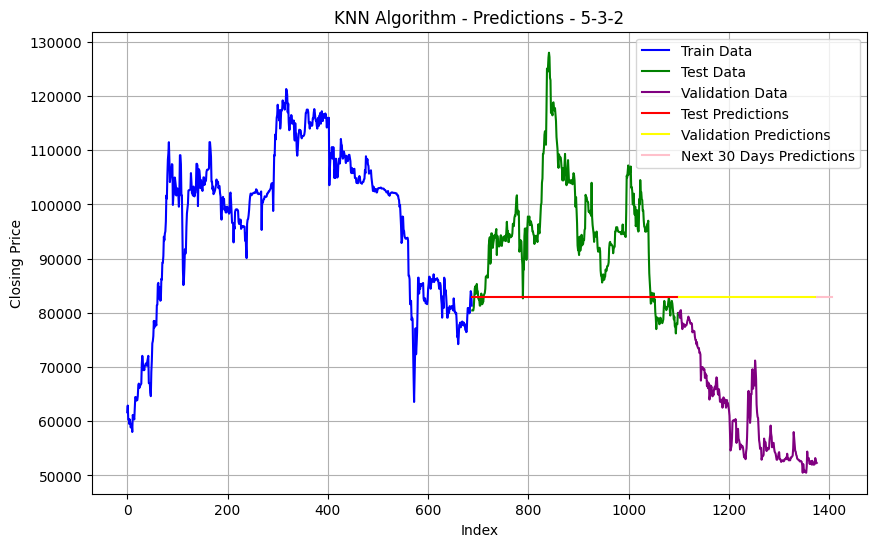

In [101]:
plt.figure(figsize=(10, 6))
plt.plot(x_train, y_train, color='blue', label='Train Data')
plt.plot(x_test, y_test, color='green', label='Test Data')
plt.plot(x_val, y_val, color='purple', label='Validation Data')
plt.plot(x_test, y_pred, color='red', label='Test Predictions')
plt.plot(x_val, y_pred_val, color='yellow', label='Validation Predictions')
plt.plot(x_next_30_days, y_next_30_days, color='pink', label='Next 30 Days Predictions')
plt.xlabel('Index')
plt.ylabel('Closing Price')
plt.title('KNN Algorithm - Predictions - 5-3-2')
plt.legend()
plt.grid(True)
plt.show()

<h1>Đánh giá độ chính xác của thuật toán

In [102]:
#RMSE
valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)

Validation RMSE: 23464.617724182703
Testing RMSE: 15479.634855503173


In [103]:
#MAE
valid_mae = mean_absolute_error(y_val,y_pred_val)
test_mae = mean_absolute_error(y_test, y_pred)
print('Validation MAE:', valid_mae)
print('Testing MAE:', test_mae)

Validation MAE: 21770.246376811596
Testing MAE: 12576.06067961165


In [104]:
#MAPE
valid_mape = np.mean(np.abs((y_val - y_pred_val) / y_val))*100
test_mape = np.mean(np.abs((y_test - y_pred) / y_test))*100
print('Validation MAPE:', valid_mape)
print('Testing MAPE:', test_mape)

Validation MAPE: 38.170377738284486
Testing MAPE: 12.488539012289456
